In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Exploring Dataset

In [41]:
countries = ['CA','US']

video = []
for cnt in countries:
    path_video = os.path.join(os.environ['HOME'],'data','youtube-trending',f'{cnt}videos.csv')
    video.append(pd.read_csv(
        path_video,
        parse_dates=['trending_date','publish_time'],
        dtype={'title': 'str', 'channel_title': 'str', 'description': 'str'}))
    video[-1].loc[:,'origin'] = cnt
    
video = pd.concat(video)
video.set_index('video_id')
video = video[(~video['video_error_or_removed']) & (~video['ratings_disabled'])]
video[:3]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,origin
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA


In [42]:
video.dtypes

video_id                               object
trending_date                          object
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
origin                                 object
dtype: object

In [43]:
video.loc[:,'trending_date'] = pd.to_datetime(
    video['trending_date'],
    format='%y.%d.%m')
video.dtypes

video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
origin                                 object
dtype: object

## Clean text (title, description)

Removing non-English letters and remove videos with short description or title

In [44]:
for tcol in ['title','description']:
    video.loc[:,tcol] = video[tcol].str.replace(
        '[^\x00-\x7F\x80-\xFF\u0100-\u017F\u0180-\u024F\u1E00-\u1EFF]', 
        '', regex=True)
    video.loc[:,tcol] = video[tcol].str.replace(
        r'\\n', '', regex=True)
    video.loc[:,tcol] = video[tcol].astype(str)
    
video = video[video['title'].str.len() > 8]
video[['title','description']]

,title,description
0,Eminem - Walk On Water (Audio) ft. Beyoncé,Eminem's new track Walk on Water ft. Beyoncé i...
1,PLUSH - Bad Unboxing Fan Mail,STill got a lot of packages. Probably will las...
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",WATCH MY PREVIOUS VIDEO SUBSCRIBE https://ww...
3,I Dare You: GOING BALD!?,I know it's been a while since we did this sho...
4,Ed Sheeran - Perfect (Official Music Video),: https://ad.gt/yt-perfect: https://atlanti.cr...
...,...,...
40944,The Cat Who Caught the Laser,The Cat Who Caught the Laser - Aaron's Animals
40945,True Facts : Ant Mutualism,nan
40946,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,I had so much fun transforming Safiyas hair in...
40947,How Black Panther Should Have Ended,How Black Panther Should Have EndedWatch More ...


## Distribution of video release dates over time

In [45]:
video.loc[:,'release'] = video['publish_time'].dt.strftime('%Y%m')
video.release

0        201711
1        201711
2        201711
3        201711
4        201711
          ...  
40944    201805
40945    201805
40946    201805
40947    201805
40948    201805
Name: release, Length: 80557, dtype: object

/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


[Text(0, 0, '200607'),
 Text(1, 0, '200801'),
 Text(2, 0, '200804'),
 Text(3, 0, '200806'),
 Text(4, 0, '200808'),
 Text(5, 0, '200902'),
 Text(6, 0, '200903'),
 Text(7, 0, '200906'),
 Text(8, 0, '200909'),
 Text(9, 0, '200912'),
 Text(10, 0, '201001'),
 Text(11, 0, '201004'),
 Text(12, 0, '201005'),
 Text(13, 0, '201009'),
 Text(14, 0, '201103'),
 Text(15, 0, '201105'),
 Text(16, 0, '201108'),
 Text(17, 0, '201111'),
 Text(18, 0, '201201'),
 Text(19, 0, '201202'),
 Text(20, 0, '201203'),
 Text(21, 0, '201206'),
 Text(22, 0, '201209'),
 Text(23, 0, '201212'),
 Text(24, 0, '201303'),
 Text(25, 0, '201305'),
 Text(26, 0, '201307'),
 Text(27, 0, '201309'),
 Text(28, 0, '201310'),
 Text(29, 0, '201311'),
 Text(30, 0, '201401'),
 Text(31, 0, '201402'),
 Text(32, 0, '201403'),
 Text(33, 0, '201406'),
 Text(34, 0, '201408'),
 Text(35, 0, '201409'),
 Text(36, 0, '201411'),
 Text(37, 0, '201412'),
 Text(38, 0, '201501'),
 Text(39, 0, '201503'),
 Text(40, 0, '201504'),
 Text(41, 0, '201505'),
 T

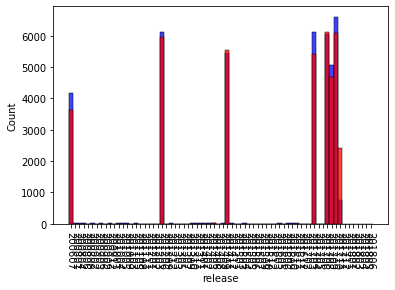

In [46]:
g1 = sns.histplot(video[video.origin=='US'].release, color='blue')
g2 = sns.histplot(video[video.origin=='CA'].release, color='red')
g1.set_xticklabels(labels=np.sort(video.release.unique()), rotation=270)

In [47]:
latest_video = video[video['publish_time'].dt.strftime('%Y%m')>='201711']
latest_video['origin'].value_counts()

US    40326
CA    39845
Name: origin, dtype: int64

## Distribution of engagement

Turns out "views" and "likes" of videos are extremely skewed.

<AxesSubplot:xlabel='origin', ylabel='views'>

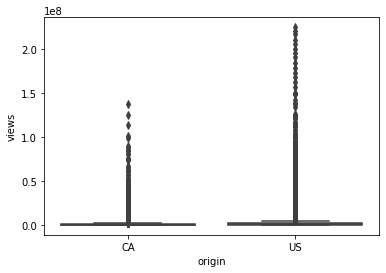

In [48]:
sns.boxplot(data=latest_video, y='views', x='origin')

<AxesSubplot:xlabel='origin', ylabel='likes'>

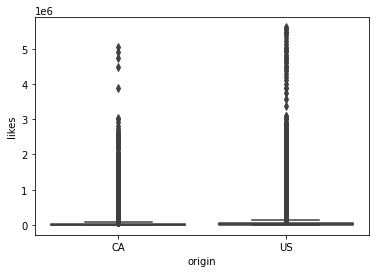

In [49]:
sns.boxplot(data=latest_video, y='likes', x='origin')

/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='origin', ylabel='logviews'>

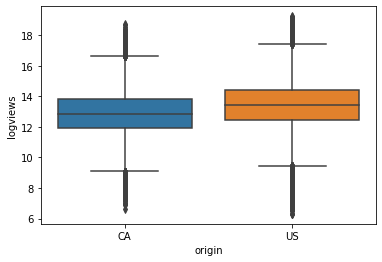

In [50]:
# Log views
latest_video.loc[:,'logviews'] = np.log(latest_video['views'])
sns.boxplot(data=latest_video, y='logviews', x='origin')

<AxesSubplot:xlabel='views', ylabel='Count'>

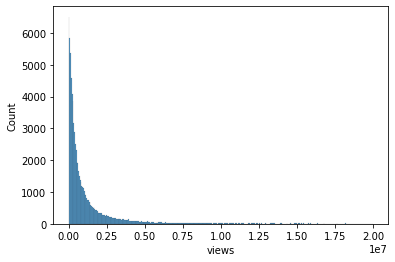

In [51]:
sns.histplot(latest_video.views[latest_video.views < 20e6])

## Engagement 

- is_hated : Videos with "dislikes" >= 0.8 * "likes + dislikes"
- is_pop : Videos with more than 1M views
 

In [52]:
latest_video.loc[:,'is_hated'] = latest_video.loc[:,'dislikes'] >= 0.8*latest_video.loc[:,'likes']
latest_video.loc[:,'is_pop'] = latest_video.loc[:,'views'] >= 1e6

latest_video[['title','is_hated','is_pop','likes','dislikes','views']][:10]

/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/pataoengineer/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,title,is_hated,is_pop,likes,dislikes,views
0,Eminem - Walk On Water (Audio) ft. Beyoncé,False,True,787425,43420,17158579
1,PLUSH - Bad Unboxing Fan Mail,False,True,127794,1688,1014651
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",False,True,146035,5339,3191434
3,I Dare You: GOING BALD!?,False,True,132239,1989,2095828
4,Ed Sheeran - Perfect (Official Music Video),False,True,1634130,21082,33523622
5,Jake Paul Says Alissa Violet CHEATED with LOGA...,False,True,103755,4613,1309699
6,Vanoss Superhero School - New Students,False,True,187464,9850,2987945
7,WE WANT TO TALK ABOUT OUR MARRIAGE,False,False,57534,2967,748374
8,THE LOGANG MADE HISTORY. LOL. AGAIN.,False,True,292837,4123,4477587
9,Finally Sheldon is winning an argument about t...,False,False,4135,976,505161


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


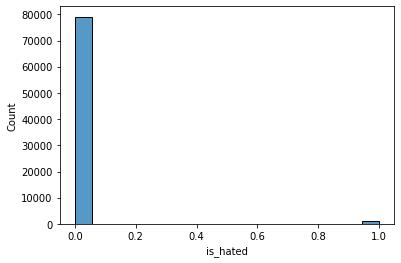

In [53]:
g = sns.histplot(latest_video['is_hated'])

In [54]:
(len(latest_video),
len(latest_video[latest_video['is_hated']]),
len(latest_video[latest_video['is_pop']]))

(80171, 1116, 25985)

## Stratified sampling

based on 'is_pop' attribute

In [55]:
dfstr = []
bins = latest_video['is_pop'].unique().tolist()
N = 5000
for b in bins:
    print(f'Sampling {N} rows from is_pop = {b}')
    dfstr.append(latest_video[latest_video['is_pop']==b].sample(n=N,replace=True))
dfstr = pd.concat(dfstr)

Sampling 5000 rows from is_pop = True
Sampling 5000 rows from is_pop = False


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='is_pop', ylabel='Count'>

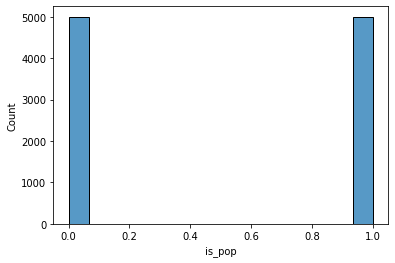

In [56]:
sns.histplot(dfstr['is_pop'])

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='is_hated', ylabel='Count'>

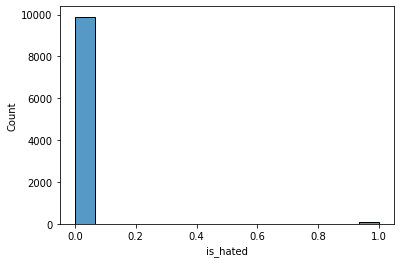

In [57]:
sns.histplot(dfstr['is_hated'])

In [58]:
len(dfstr)

10000

## Explore channel features

In [59]:
channel_size = dfstr['channel_title'].value_counts()
channel_size = channel_size.reset_index(drop=False)
channel_size.columns = ['channel_title','num_videos']
channel_size

,channel_title,num_videos
0,BuzzFeedVideo,55
1,Screen Junkies,53
2,The Late Show with Stephen Colbert,51
3,The Tonight Show Starring Jimmy Fallon,48
4,TheEllenShow,48
...,...,...
2462,At The Races,1
2463,Tj Hunt,1
2464,Leroy Sanchez,1
2465,CELEBRITY PLUS,1


<AxesSubplot:>

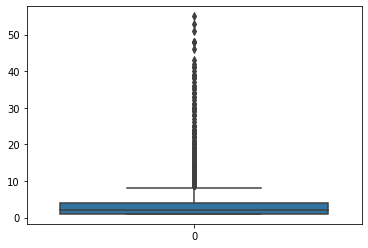

In [60]:
sns.boxplot(data=channel_size['num_videos'])

In [61]:
def bin_size(vn):
    if vn<=10:
        return '0-10'
    elif vn<25:
        return '10-25'
    elif vn<50:
        return '25-50'
    elif vn<100:
        return '50-100'
    else:
        return 'over100'
channel_size.loc[:,'channel_size'] = channel_size['num_videos'].apply(bin_size)

In [62]:
channel_size[:4]

,channel_title,num_videos,channel_size
0,BuzzFeedVideo,55,50-100
1,Screen Junkies,53,50-100
2,The Late Show with Stephen Colbert,51,50-100
3,The Tonight Show Starring Jimmy Fallon,48,25-50


<AxesSubplot:xlabel='channel_size', ylabel='Count'>

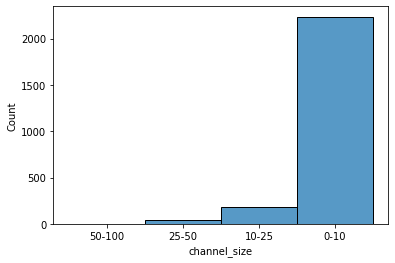

In [63]:
sns.histplot(channel_size, x='channel_size')

In [64]:
dfstr = dfstr.merge(
    channel_size[['channel_size','channel_title']], 
    on=['channel_title'], how='inner')

## Explore text features

In [65]:
dfstr[['channel_size','title','description']]

,channel_size,title,description
0,0-10,PAPILLON | Official Trailer,Official Site: http://www.Papillon.MovieLIKE u...
1,0-10,UNSANE | Official Trailer | In theaters March 23,Official Site: http://www.Unsane.movieLIKE us ...
2,0-10,BEIRUT | Official Trailer,Official Site: http://www.BeirutMovie.comLIKE ...
3,10-25,I GOT MY HOARDING ROOM PROFESSIONALLY ORGANIZED!,shop my closet!! https://sgz.app.link/sSbTsmuB...
4,10-25,I GOT MY HOARDING ROOM PROFESSIONALLY ORGANIZED!,shop my closet!! https://sgz.app.link/sSbTsmuB...
...,...,...,...
9995,0-10,RGB Pixel Christmas Tree,"Christmas Tree with Trolls, Moana, and Christm..."
9996,0-10,Developing a Permanent Treatment for Lactose I...,For more than half a decade I've suffered from...
9997,0-10,Big Bang Recap - The Celebration Reverberation...,Hi everyone! Mayim Bialik here. You may know m...
9998,0-10,Try Not To Laugh Watching Funny Fail Compilati...,Try Not To Laugh Watching Funny Fail Compilati...


In [66]:
text = dfstr['title'] + ' ' + dfstr['description']

In [67]:
len(text.str.split(' ').explode().unique())

124010

# Build the first CNN

## Split dataset

In [68]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dfstr, test_size=0.1)

In [69]:
len(train), len(test)

(9000, 1000)

## Text Vectorisation Layer

In [70]:
# Layer : Text encoder for title + description
VOCAB_SIZE = 2500
SEQ_LEN = 256
import tensorflow as tf

encoder_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_sequence_length=SEQ_LEN)

# Adapt encoder to the vocab list from pandas
text_train = train['title'] + ' ' + train['description']
text_train = text_train.str.split(' ').explode().reset_index(drop=True)
encoder_layer.adapt(tf.data.Dataset.from_tensor_slices(
    text_train.values).batch(256))

In [71]:
encoder_layer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'to', 'and', 'on', 'a', 'of', 'in', 'for']

In [72]:
# Layer : text encoder for channel size
channel_encoder_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=10, # need to preserve +2 for [UNK, '']
    output_sequence_length=2,
)

# Adapt encoder to channel size list from pandas
channel_sizes = train['channel_size']
channel_encoder_layer.adapt(tf.data.Dataset.from_tensor_slices(
    channel_sizes.values
))

In [73]:
channel_encoder_layer.get_vocabulary()

['', '[UNK]', '010', '1025', '2550', '50100']

## Simple Sequential Model
Using title+description text input only

> Text input -> Encoder -> Embedding -> LSTM -> ReLu

In [104]:
model = tf.keras.models.Sequential()
model.add(encoder_layer)
model.add(tf.keras.layers.Embedding(
    input_dim=len(encoder_layer.get_vocabulary()),
    output_dim=64,
    # Use masking to handle the variable sequence lengths
    mask_zero=True))
model.add(tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(64, dropout=0.2)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [105]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy'])

In [106]:
logdir = os.path.join(os.getcwd(), 'logs')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

text_train = train['title'] + ' ' + train['description']
assert len(text_train) == len(train['is_pop'])

session = model.fit(
    text_train,
    train['is_pop'], 
    batch_size=128,
    epochs=10, 
    callbacks=[tensorboard_callback])


Epoch 1/10
71/71 [==============================] - 39s 409ms/step - loss: 0.6420 - accuracy: 0.5968
Epoch 2/10
71/71 [==============================] - 27s 382ms/step - loss: 0.3829 - accuracy: 0.8354
Epoch 3/10
71/71 [==============================] - 26s 367ms/step - loss: 0.2752 - accuracy: 0.8935
Epoch 4/10
71/71 [==============================] - 26s 362ms/step - loss: 0.2225 - accuracy: 0.9096
Epoch 5/10
71/71 [==============================] - 26s 368ms/step - loss: 0.1733 - accuracy: 0.9314
Epoch 6/10
71/71 [==============================] - 26s 361ms/step - loss: 0.1444 - accuracy: 0.9417
Epoch 7/10
71/71 [==============================] - 24s 334ms/step - loss: 0.1254 - accuracy: 0.9475
Epoch 8/10
71/71 [==============================] - 24s 337ms/step - loss: 0.1111 - accuracy: 0.9500
Epoch 9/10
71/71 [==============================] - 25s 344ms/step - loss: 0.1128 - accuracy: 0.9491
Epoch 10/10
71/71 [==============================] - 26s 360ms/step - loss: 0.0973 - accura

<AxesSubplot:>

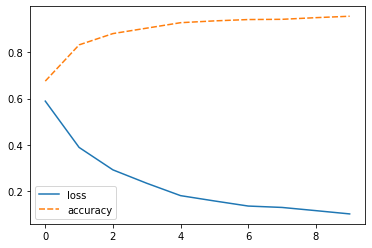

In [107]:
sns.lineplot(data=session.history)

In [78]:
%tensorboard --logdir logs

UsageError: Line magic function `%tensorboard` not found.


## Test model in action

In [82]:
test_text = test['title'] + ' ' + test['description']
test_text[:5]

6826    Billie Eilish - lovely (with Khalid) Listen to...
1348    ON CRÉE DES CHANSONS EN IMPRO feat. Maxenss et...
926     Pastry Chef Attempts To Make Gourmet Cheetos |...
1672    Chili Klaus Faces the Most Extreme Hot Ones Ev...
5236    L'ORAL DU BAC VU PAR UN ÉLÉVE Bon en vrai ce q...
dtype: object

In [83]:
list(zip(model.predict(test_text[:5]), test[:5]['is_pop']))

[(array([0.9998739], dtype=float32), False),
 (array([0.99903184], dtype=float32), True),
 (array([0.01749188], dtype=float32), True),
 (array([0.53428906], dtype=float32), True),
 (array([0.9834794], dtype=float32), False)]

## Multi-input Model Diagram

Now concatenating text input with other numerical features

```
Text input -> Encoder -> Embedding -> LSTM
                                      /
                                     /
Channel size input -> Onehot ----->> concatenate --> ReLU
                                   /
                                  /
Other numerical input ------------
```

In [84]:
tf.keras.layers.concatenate

<function tensorflow.python.keras.layers.merge.concatenate(inputs, axis=-1, **kwargs)>

In [85]:
# Input 1 : title + descrption
input_text = tf.keras.layers.Input(shape=(1,), dtype=tf.string, name="text")
t = encoder_layer(input_text)
t = tf.keras.layers.Embedding(
    input_dim=len(encoder_layer.get_vocabulary()),
    output_dim=64,
    mask_zero=True)(t)
t = tf.keras.layers.Bidirectional(
     tf.keras.layers.LSTM(64, dropout=0.2))(t)
t = tf.keras.layers.Dense(64, activation='relu')(t)
t = tf.keras.models.Model(inputs=input_text, outputs=t)
t

In [86]:
# Input 2 : Channel size
input_channel = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name="channel")
c = tf.keras.layers.Dense(1, activation="relu")(input_channel)
c = tf.keras.models.Model(inputs=input_channel, outputs=c)
c

In [87]:
# Input 3 : Cnt origin
input_origin = tf.keras.layers.Input(
    shape=(1,), dtype=tf.float32, name="origin")
g = tf.keras.layers.Dense(1, activation='relu')(input_origin)
g = tf.keras.models.Model(inputs=input_origin, outputs=g)
g

In [110]:
t.output.shape, c.output.shape, g.output.shape

(TensorShape([None, 64]), TensorShape([None, 1]), TensorShape([None, 1]))

In [92]:
# Concatenated Inputs

concat = tf.keras.layers.concatenate([
    t.output, c.output, g.output
])
# -------------

out = tf.keras.layers.Dense(64)(concat)
out = tf.keras.layers.Dense(1, activation='softmax')(out)

model_concat = tf.keras.models.Model(
    inputs=[input_text, input_channel, input_origin],
    outputs=out)

In [94]:
model_concat.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy'])

In [95]:
model.trainable

True

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
logdir = os.path.join(os.getcwd(), 'logs')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

train.loc[:,'txt'] = train['title'] + ' ' + train['description']
train.loc[:,'encoded_channel_size'] = LabelEncoder().fit_transform(train['channel_size'])
train.loc[:,'encoded_origin'] = LabelEncoder().fit_transform(train['origin'])

train.loc[:,'encoded_channel_size'] = train.loc[:,'encoded_channel_size'].astype(float)
train.loc[:,'encoded_origin'] = train.loc[:,'encoded_origin'].astype(float)

session = model_concat.fit(
    [train['txt'], train['encoded_channel_size'], train['encoded_origin']],
    train['is_pop'], 
    batch_size=128,
    epochs=10, 
    callbacks=[tensorboard_callback])

Epoch 1/10
71/71 [==============================] - 26s 287ms/step - loss: 0.6282 - accuracy: 0.5086
Epoch 2/10
71/71 [==============================] - 21s 294ms/step - loss: 0.3782 - accuracy: 0.5015
Epoch 3/10
71/71 [==============================] - 21s 298ms/step - loss: 0.2614 - accuracy: 0.4984
Epoch 4/10
71/71 [==============================] - 21s 303ms/step - loss: 0.1995 - accuracy: 0.5086
Epoch 5/10
71/71 [==============================] - 21s 298ms/step - loss: 0.1760 - accuracy: 0.4904
Epoch 6/10
71/71 [==============================] - 21s 295ms/step - loss: 0.1490 - accuracy: 0.4930
Epoch 7/10
71/71 [==============================] - 21s 296ms/step - loss: 0.1373 - accuracy: 0.5031
Epoch 8/10
71/71 [==============================] - 21s 298ms/step - loss: 0.1097 - accuracy: 0.4989
Epoch 9/10
71/71 [==============================] - 21s 300ms/step - loss: 0.1106 - accuracy: 0.4870
Epoch 10/10
71/71 [==============================] - 22s 315ms/step - loss: 0.0848 - accura

In [116]:
session.history

{'loss': [0.589099109172821,
  0.38974276185035706,
  0.29311755299568176,
  0.23544080555438995,
  0.1821800023317337,
  0.15932072699069977,
  0.13735638558864594,
  0.1313490867614746,
  0.11757225543260574,
  0.10347236692905426],
 'accuracy': [0.6753333210945129,
  0.831333339214325,
  0.8798888921737671,
  0.903333306312561,
  0.9267777800559998,
  0.9345555305480957,
  0.9403333067893982,
  0.9413333535194397,
  0.9484444260597229,
  0.9545555710792542]}

In [ ]:
%tensorboard  --logdir logs

<AxesSubplot:>

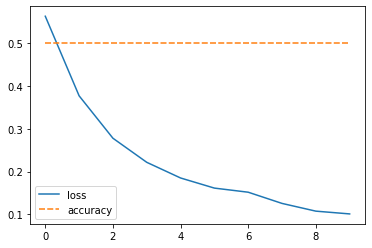

In [103]:
sns.lineplot(data=session.history)